# Mechanisms of Action

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = '/kaggle/input/lish-moa/'

train = pd.read_csv(DATA_DIR + 'train_features.csv')
targets = pd.read_csv(DATA_DIR + 'train_targets_scored.csv')
test = pd.read_csv(DATA_DIR + 'test_features.csv')

In [6]:
#Рассмотрим train и test 
print('Train size: ',train.shape)
train.head()

Train size:  (23814, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [7]:
print('Test size: ', test.shape)
test.head()

Test size:  (3982, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


## EDA

### Countplot

In [8]:
def countplot(feature):
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    sns.countplot(train[feature])
    plt.subplot(1,2,2)
    sns.countplot(test[feature])
    print('TRAIN: ')
    counts = train[feature].value_counts()
    for i in range(len(counts)):
        print(f'count of {counts.index[i]} is: {counts.values[i]}')
    print('TEST: ')
    counts = test[feature].value_counts()
    for i in range(len(counts)):
        print(f'count of {counts.index[i]} is: {counts.values[i]}')   

#### cp_type

TRAIN: 
count of trt_cp is: 21948
count of ctl_vehicle is: 1866
TEST: 
count of trt_cp is: 3624
count of ctl_vehicle is: 358


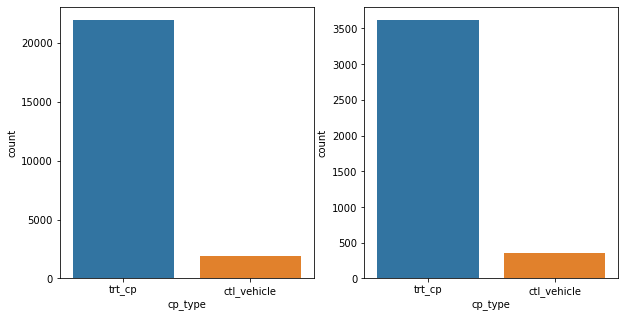

In [9]:
countplot('cp_type')

#### cp_time

TRAIN: 
count of 48 is: 8250
count of 72 is: 7792
count of 24 is: 7772
TEST: 
count of 48 is: 1377
count of 72 is: 1305
count of 24 is: 1300


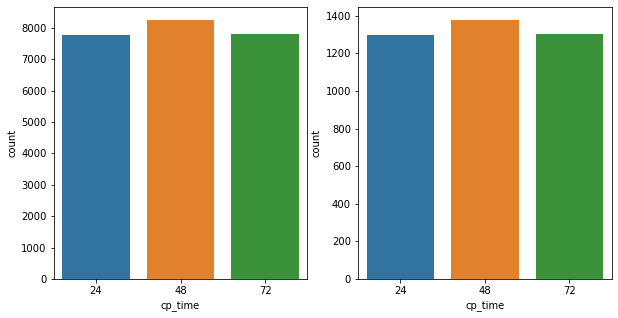

In [10]:
countplot('cp_time')

#### cp_dose

TRAIN: 
count of D1 is: 12147
count of D2 is: 11667
TEST: 
count of D1 is: 2027
count of D2 is: 1955


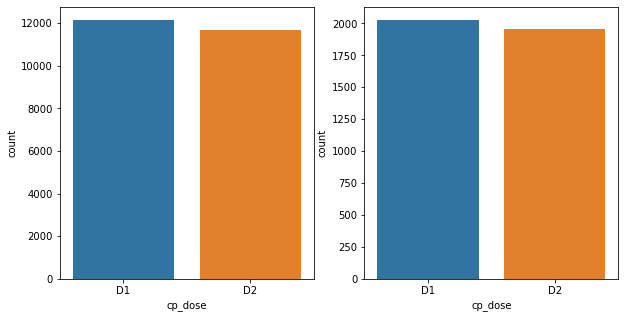

In [11]:
countplot('cp_dose')

### Distribution

In [12]:
def distribution(data, feature):
    plt.figure(figsize=(12,5))
    sns.distplot(data[feature])
    print('Max value of {} is: {:.2f} \nMin value of {} is: {:.2f}\nMean value of {} is:\
          {:.2f}\nStandard Deviation of {} is: {:.2f}'.format(feature, data[feature].max(),
          feature,data[feature].min(), feature, data[feature].mean(),feature, 
          data[feature].std()))

#### Рассмотрим GENES и CELLS признаки

In [14]:
GENES = [i for i in train.columns if i.startswith('g-')]
CELLS = [i for i in train.columns if i.startswith('c-')]

#Найдем среднее этих признаков
GENES_mean = train[GENES].mean(1)
CELLS_mean = train[CELLS].mean(1)

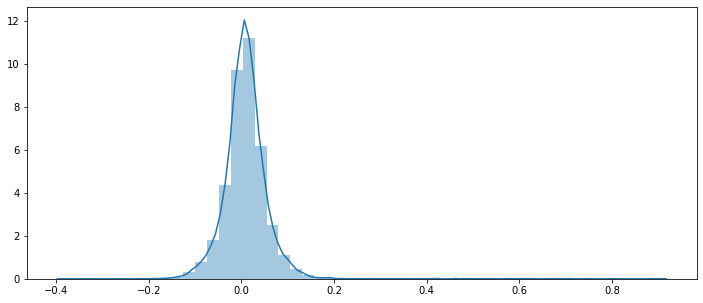

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(GENES_mean);

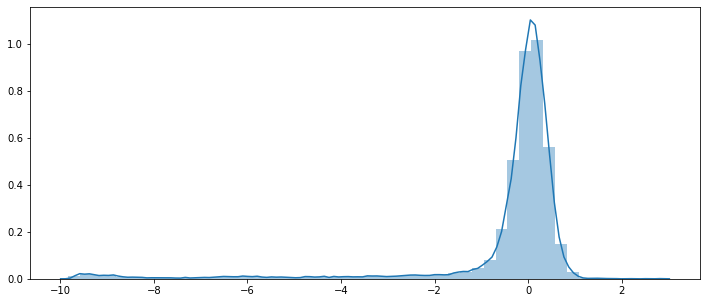

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(CELLS_mean);

### Targets 

In [28]:
print('Targets size: ', targets.shape)
targets.head()

Targets size:  (23814, 207)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


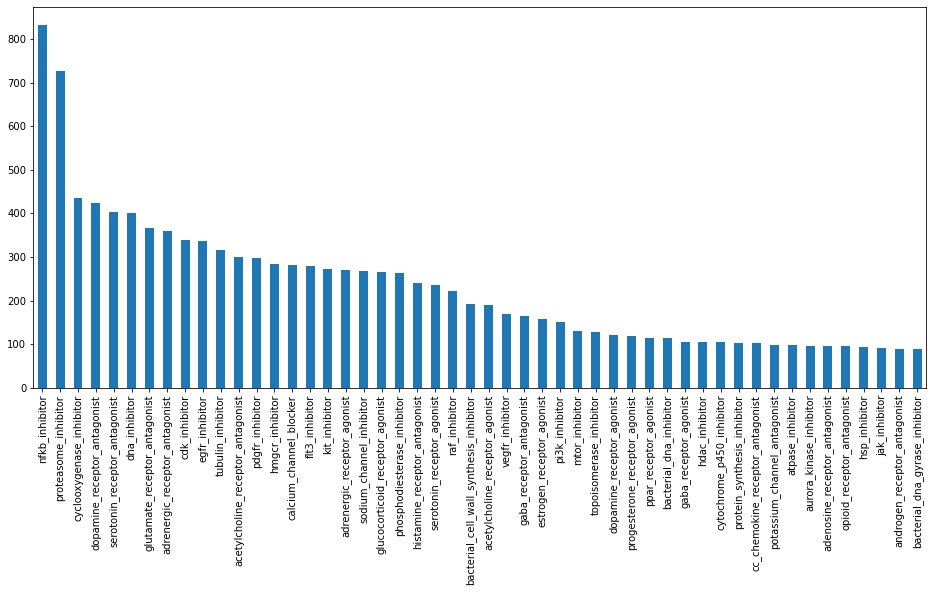

In [18]:
#Рассмотрим первые 50 признаков, с наибольшим количеством положительных значений
df_max = targets.iloc[:, 1:].sum(0).sort_values(ascending=False)[:50]
plt.figure(figsize=(16, 7))
df_max.plot(kind='bar');

#### Большой дисбаланс классов

In [20]:
df_max[:5] / targets.shape[0]

nfkb_inhibitor                   0.034937
proteasome_inhibitor             0.030486
cyclooxygenase_inhibitor         0.018267
dopamine_receptor_antagonist     0.017805
serotonin_receptor_antagonist    0.016965
dtype: float64

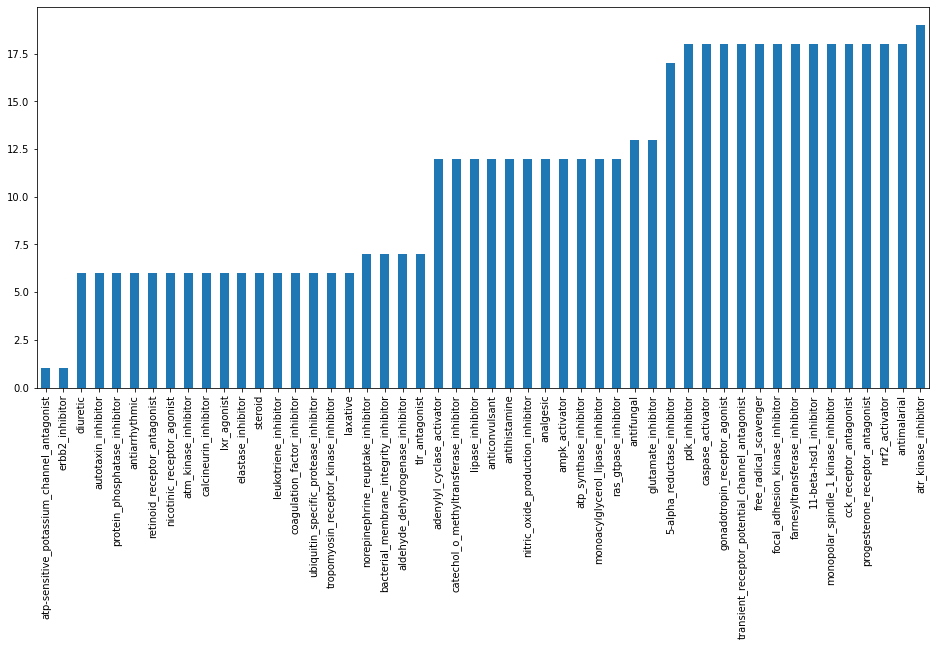

In [22]:
#Первые 50 переменных, с наименьшим количеством положительных значений
df_min = targets.iloc[:, 1:].sum(0).sort_values()[:50]
plt.figure(figsize=(16, 7))
df_min.plot(kind='bar');

In [23]:
#Две переменные имеют только по одному положительному значению, что может привести к ошибкам при валидации (в зависимости от модели)
print(df_min[:2])

atp-sensitive_potassium_channel_antagonist    1
erbb2_inhibitor                               1
dtype: int64


In [24]:
#При cp_type == ctl_vehicle все значения в целевых признаках нулевые
idx = train[train['cp_type']=='ctl_vehicle']['sig_id'].index
targets.iloc[idx, 1:].sum().sum()

0